
# 2D free support Wasserstein barycenters of distributions

Illustration of 2D Wasserstein and Sinkhorn barycenters if distributions are weighted
sum of Diracs.


In [27]:
# Authors: Vivien Seguy <vivien.seguy@iip.ist.i.kyoto-u.ac.jp>
#          Rémi Flamary <remi.flamary@polytechnique.edu>
#          Eduardo Fernandes Montesuma <eduardo.fernandes-montesuma@universite-paris-saclay.fr>
#
# License: MIT License

#sphinx_gallery_thumbnail_number = 2

import numpy as np
import matplotlib.pylab as pl
import ot

## Generate data



Text(0.5, 1.0, 'Distributions')

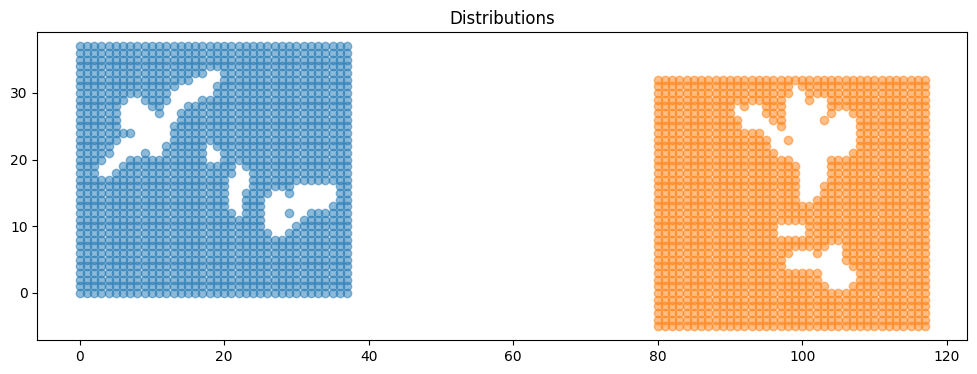

In [28]:
N = 2
d = 2

I1 = pl.imread("2.png").astype(np.float64)[::2, ::2, 2]
I2 = pl.imread("2-2.png").astype(np.float64)[::2, ::2, 2]

sz = I2.shape[0]
XX, YY = np.meshgrid(np.arange(sz), np.arange(sz))

x1 = np.stack((XX[I1 == 0], YY[I1 == 0]), 1) * 1.0
x2 = np.stack((XX[I2 == 0] + 80, -YY[I2 == 0] + 32), 1) * 1.0
x3 = np.stack((XX[I2 == 0], -YY[I2 == 0] + 32), 1) * 1.0

measures_locations = [x1, x2]
measures_weights = [ot.unif(x1.shape[0]), ot.unif(x2.shape[0])]

pl.figure(1, (12, 4))
pl.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
pl.scatter(x2[:, 0], x2[:, 1], alpha=0.5)
pl.title("Distributions")

## Compute free support Wasserstein barycenter



In [23]:
k = 200  # number of Diracs of the barycenter
X_init = np.random.normal(0.0, 1.0, (k, d))  # initial Dirac locations
b = (
    np.ones((k,)) / k
)  # weights of the barycenter (it will not be optimized, only the locations are optimized)

X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

## Plot the Wasserstein barycenter



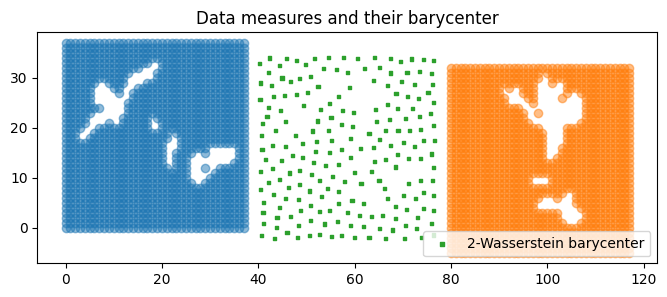

In [24]:
pl.figure(2, (8, 3))
pl.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
pl.scatter(x2[:, 0], x2[:, 1], alpha=0.5)
pl.scatter(X[:, 0], X[:, 1], s=b * 1000, marker="s", label="2-Wasserstein barycenter")
pl.title("Data measures and their barycenter")
pl.legend(loc="lower right")
pl.show()

Compute free support Sinkhorn barycenter



In [25]:
k = 200  # number of Diracs of the barycenter
X_init = np.random.normal(0.0, 1.0, (k, d))  # initial Dirac locations
b = (
    np.ones((k,)) / k
)  # weights of the barycenter (it will not be optimized, only the locations are optimized)

X = ot.bregman.free_support_sinkhorn_barycenter(
    measures_locations, measures_weights, X_init, 20, b, numItermax=15
)

## Plot the Wasserstein barycenter



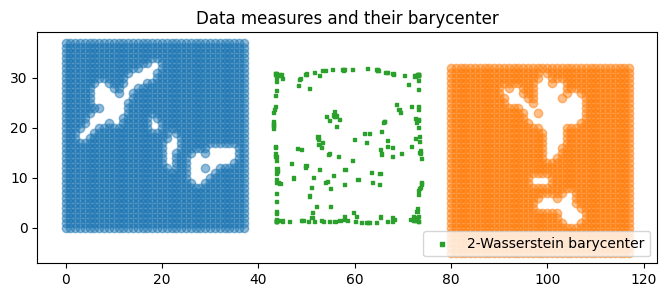

In [26]:
pl.figure(2, (8, 3))
pl.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
pl.scatter(x2[:, 0], x2[:, 1], alpha=0.5)
pl.scatter(X[:, 0], X[:, 1], s=b * 1000, marker="s", label="2-Wasserstein barycenter")
pl.title("Data measures and their barycenter")
pl.legend(loc="lower right")
pl.show()

In [29]:
plt.show()

# Plot contour
pl.figure(3, (8, 3))
pl.contour(XX, YY, I1, levels=10, cmap='Blues')
pl.contour(XX, YY, I2, levels=10, cmap='Reds')
pl.title("Contour plot of I1 and I2")
pl.show()

NameError: name 'plt' is not defined